<a href="https://colab.research.google.com/github/rodrigowe1988/Data-Science-na-Pratica/blob/main/Visualizar_dados_das_a%C3%A7%C3%B5es_BBSA3_Dados_consumo_de_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importar biblioteca pandas
import pandas as pd

#importar o arquivo csv com os dados de BBSA3
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/BBAS3.SA.csv", parse_dates=True, index_col='Date')

#devolver o cabeçalho
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,49.470001,49.669998,49.180000,49.369999,46.886795,6314800.0
2019-05-07,49.080002,49.680000,48.220001,49.490002,47.000763,10846100.0
2019-05-08,49.500000,50.840000,49.500000,50.590000,48.045422,14459600.0
2019-05-09,50.910000,51.259998,50.119999,51.029999,48.463291,15377500.0
2019-05-10,51.099998,51.189999,49.860001,50.160000,47.637051,8975300.0


In [42]:
df.index

DatetimeIndex(['2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17',
               ...
               '2020-04-17', '2020-04-20', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-04'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

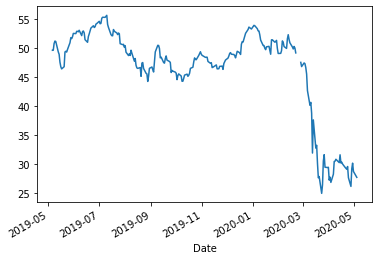

In [43]:
#plotar um gráfico somente com as máximas de preço (coluna High)
df.High.plot()

In [44]:
df_cerveja = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/consumo_cerveja.csv", parse_dates=True, index_col='data')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,49.470001,49.669998,49.180000,49.369999,46.886795,6314800.0
2019-05-07,49.080002,49.680000,48.220001,49.490002,47.000763,10846100.0
2019-05-08,49.500000,50.840000,49.500000,50.590000,48.045422,14459600.0
2019-05-09,50.910000,51.259998,50.119999,51.029999,48.463291,15377500.0
2019-05-10,51.099998,51.189999,49.860001,50.160000,47.637051,8975300.0


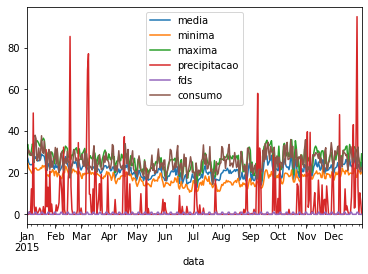

In [45]:
 df_cerveja.plot()

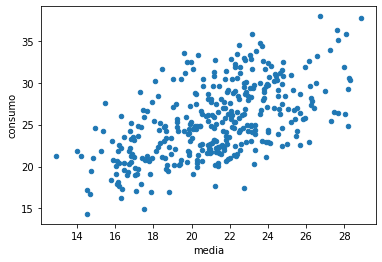

In [46]:
#plotar um gráfico de dispersão
df_cerveja.plot.scatter('media', 'consumo')

## Boxplot

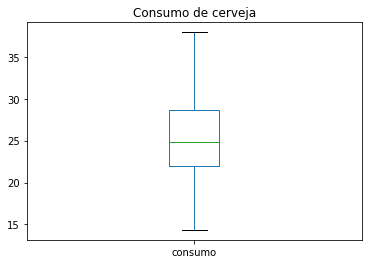

In [47]:
df_cerveja.consumo.plot(kind='box', title='Consumo de cerveja');

In [77]:
DATA_PATH = "https://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv "

df_path = pd.read_csv(DATA_PATH)
df_path.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


## Valores Ausentes

* ao trabalharmos com valores ausentes cada caso é um caso a parte. Terá vezes em que excluir os dados ausentes seja a melhor alternativa. Em outras teremos que preencher com determinado dado (média, mediana, valor que mais aparece,...).

In [78]:
#ver a quantidade de valores ausentes
nul_value = df_path.isnull().sum()
nul_value

user_gender          396
user_birthdate         1
user_residence    179905
ride_date              0
time_start             0
time_end           43285
station_start          0
station_end            0
ride_duration      73174
ride_late          73174
dtype: int64

In [56]:
#pegar os valores ausentes e calcular a porcentagem em cada coluna
print("Porcentagem de valores ausentes em cada coluna: \n")
nul_value / df_path.shape[0] * 100

Porcentagem de valores ausentes em cada coluna: 



user_gender        0.137824
user_birthdate     0.000348
user_residence    62.614419
ride_date          0.000000
time_start         0.000000
time_end          15.064979
station_start      0.000000
station_end        0.000000
ride_duration     25.467594
ride_late         25.467594
dtype: float64

### Excluir os valores ausentes:

In [63]:
#eliminar todas as entradas onde existem valores ausentes em 'user_gender'
df_clean = df_path.dropna(subset=['user_gender'], axis=0)
perda_dados = df_path.shape[0] - df_clean.shape[0]

#comparar o antes e o depois do dataframe
print(f"Antes:  {df_path.shape}")
print(f"Depois: {df_clean.shape}")

print(f"Perceba que ao fazer isso sacrificamos {perda_dados} entradas do nosso dataframe.")

Antes:  (287322, 10)
Depois: (286926, 10)
Perceba que ao fazer isso sacrificamos 396 entradas do nosso dataframe.


### Preencher os valores ausentes
Essa é, normalmente, a melhor opção, pois permite que você mantenha dados existentes em outras células.


In [64]:
df_clean.isnull().sum()

user_gender            0
user_birthdate         1
user_residence    179818
ride_date              0
time_start             0
time_end           43212
station_start          0
station_end            0
ride_duration      73064
ride_late          73064
dtype: int64

In [79]:
#ver a quantidade de usuários por sexo em user_gender
df_clean.user_gender.value_counts()

M    212608
F     74318
Name: user_gender, dtype: int64

In [75]:
#preenchendo os valores da coluna ride_duration com a mediana
rd_median = df_clean.ride_duration.median()

#usando o valor da mediana para preencher os 73064 dados ausentes
df_clean = df_clean.fillna({"ride_duration": rd_median})
df_clean.isnull().sum()

user_gender            0
user_birthdate         1
user_residence    179818
ride_date              0
time_start             0
time_end           43212
station_start          0
station_end            0
ride_duration          0
ride_late          73064
dtype: int64

In [80]:
#preenchendo os dados de gênero com 'M' que é a moda
df_clean = df_clean.fillna({'user_gender': 'M'})

In [82]:
#ver a quantidade de usuários por sexo em user_gender após atualizar
df_clean.user_gender.unique()

array(['M', 'F'], dtype=object)